In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Import required libraries

In [2]:
df = pd.read_csv(r'D:\Chicago-Dataset\Start-community-number-grouped.csv')

read the csv file containing community numrber and counts

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   area_numbe  77 non-null     int64
 1   count       77 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


Check the datatypes of columns. To merge DFs we need to have same type

In [4]:
chicago=gpd.read_file(r'D:\Chicago-Dataset\shape files\Boundaries\geo_export_e77c98d1-3897-4fcc-b507-819f0039486f.shp')

read shape file into a vriable

In [5]:
chicago.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   area        77 non-null     float64 
 1   area_num_1  77 non-null     object  
 2   area_numbe  77 non-null     object  
 3   comarea     77 non-null     float64 
 4   comarea_id  77 non-null     float64 
 5   community   77 non-null     object  
 6   perimeter   77 non-null     float64 
 7   shape_area  77 non-null     float64 
 8   shape_len   77 non-null     float64 
 9   geometry    77 non-null     geometry
dtypes: float64(6), geometry(1), object(3)
memory usage: 6.1+ KB


check datatypes of columns. 

In [6]:
chicago["area_numbe"]=chicago["area_numbe"].astype(str).astype(int)

convert merging column to int. since the other DF contain merging column int

In [7]:
map_and_count=chicago.merge(df, on="area_numbe")

merge to DFs based on common area_numbe column

In [8]:
map_and_count

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,count
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",2461
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",609
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",376
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",3279
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",3344
...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",1359
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",1379
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",15
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",14554


see resultant DF

<AxesSubplot:>

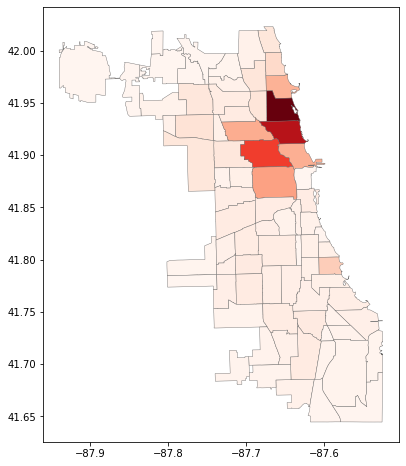

In [9]:
fig,ax = plt.subplots(1, figsize=(8,8))
map_and_count.plot(column="count", cmap="Reds", ax=ax, linewidth=0.4, edgecolor=".4")

plot map.

<AxesSubplot:>

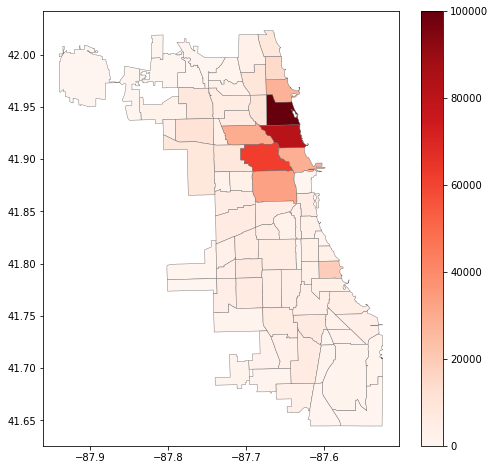

In [10]:
fig,ax = plt.subplots(1, figsize=(8,8))
bar_info=plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=100000))
bar_info._A=[]
cbar=fig.colorbar(bar_info)
map_and_count.plot(column="count", cmap="Reds", ax=ax, linewidth=0.4, edgecolor=".4")


Add color bar into graph